In [335]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [336]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Make Synthetic Data

In [337]:
l_n = 200
data = np.sin(0.1 * np.arange(l_n)) + np.random.randn(l_n) * 0.1

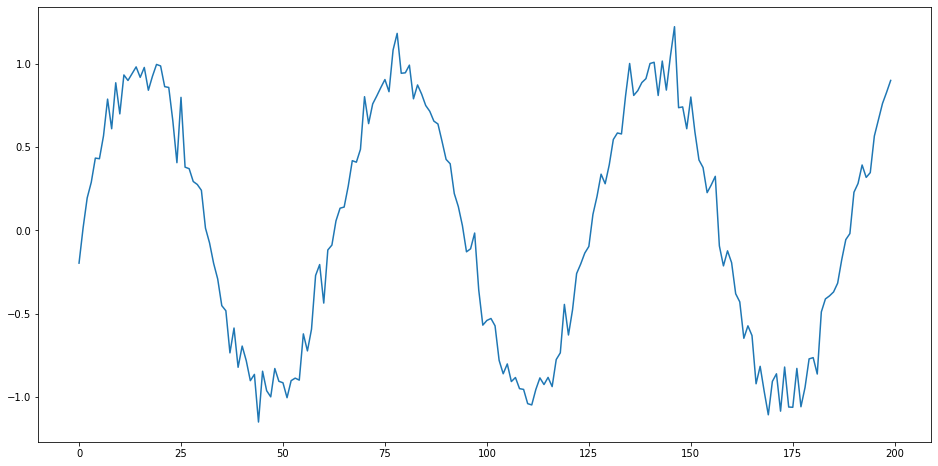

In [338]:
plt.figure(figsize=(16, 8))
plt.plot(data)
plt.show()

Build dataset

In [339]:
# X = N x T x D dimension data
# N -> Number of sample
# T -> Number of past value to be feature
# D -> Number of dimension -> 1

T = 10
D = 1
N = len(data)

In [340]:
X = []
Y = []
for i in range(N - T):
    X.append(data[i:i+T])
    Y.append(data[i+T])

In [341]:
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)

In [342]:
n = len(X)

In [343]:
print(f'X shape: {X.shape}; Y shape: {Y.shape}')

X shape: (190, 10, 1); Y shape: (190,)


### Model Train

In [344]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='tanh')(i)
x = Dense(1)(x)

In [345]:
model = Model(i, x)
model.summary()

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_18 (SimpleRNN)    (None, 5)                 35        
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [346]:
model.compile(optimizer=Adam(lr=0.1), loss='mean_squared_error')

Split data by half for train and validation based on time

In [347]:
r = model.fit(X[:-n//2], Y[:-n//2], epochs=100, validation_data=(X[-n//2:], Y[-n//2:]))

Epoch 1/100
3/3 [==============================] - 0s 44ms/step - loss: 0.1133 - val_loss: 0.0709
Epoch 2/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0582 - val_loss: 0.0695
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0443 - val_loss: 0.0338
Epoch 4/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0337 - val_loss: 0.0339
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0317 - val_loss: 0.0261
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0301 - val_loss: 0.0241
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.0316
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0299 - val_loss: 0.0281
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0250 - val_loss: 0.0244
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.0271 - val_loss: 0.0216
Epoch 11/100
3/3 [==========

### Model Evaluation

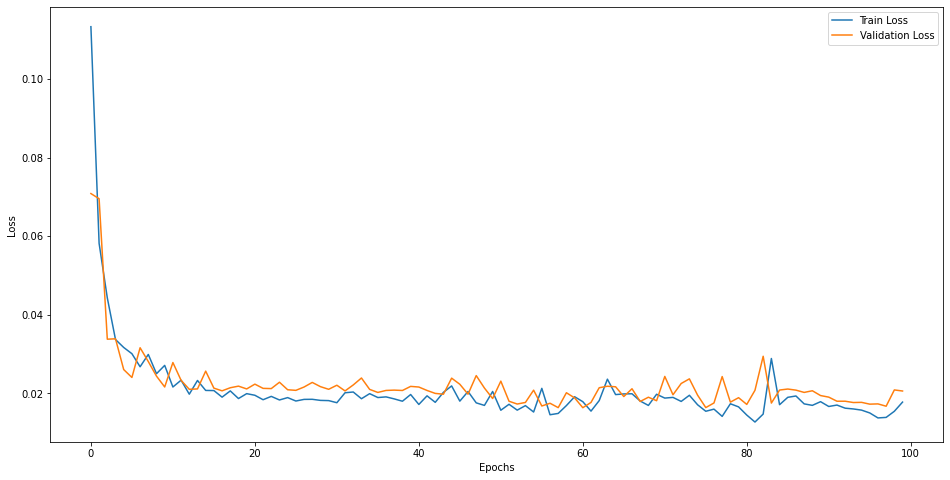

In [348]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Make predictions using validation data

In [349]:
y_val = Y[-n//2:]
y_pred = []

last_x = X[-n//2]

In [350]:
while len(y_pred) < len(y_val):
    p = model.predict(last_x.reshape(1, -1, 1))[0,0]
    y_pred.append(p)
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

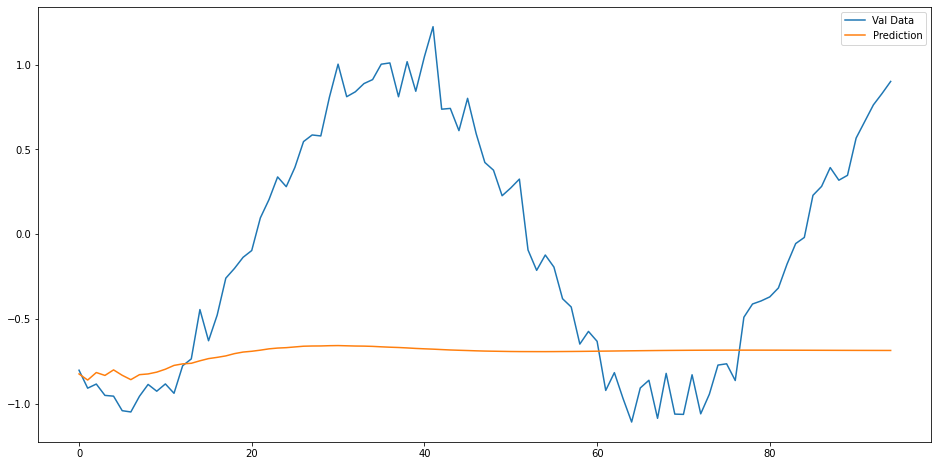

In [351]:
plt.figure(figsize=(16, 8))
plt.plot(y_val, label='Val Data')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()